In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x, y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.4
    return (x, y)

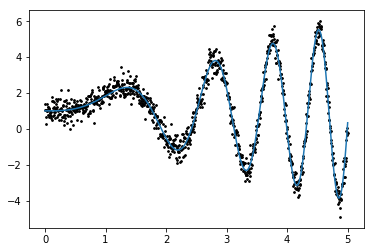

In [5]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y  = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [6]:
X.shape, y.shape

((1000,), (1000,))

In [7]:
# fit 할 때는 2차원이여야 함
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y) # y 절편 들어가고, cpu 1개만 쓰고 자체 노말라이즈 안 해줌

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

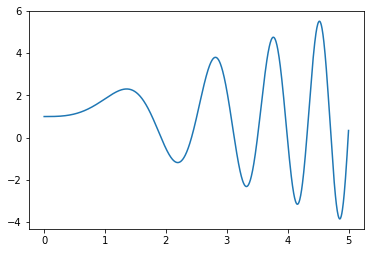

In [22]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.show()

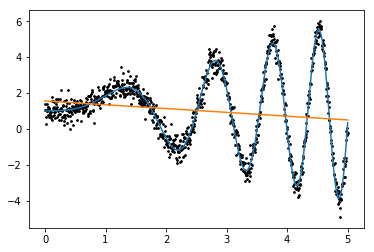

In [26]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black') # s는 scatter 굵기
plt.plot(X.flatten(), lr.predict(X).flatten()) # 예측값
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2) # 2차항으로 만듦
X_poly = poly_features.fit_transform(X)
X_poly[:10] # X0, X1, X1 ** 2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [29]:
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

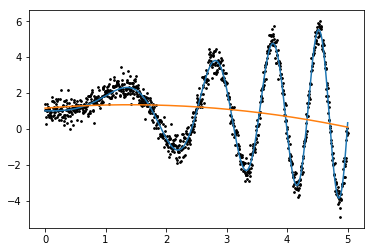

In [32]:
# 위 모델보다 표현력이 조금 더 좋아 보인다.
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [33]:
poly_features = PolynomialFeatures(degree = 16) # 16차원까지 늘려봤음
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

<function matplotlib.pyplot.show(*args, **kw)>

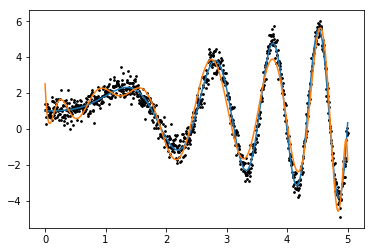

In [35]:
lr = LinearRegression()
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show

In [37]:
# rmse값으로 차수들을 10부터 50차항까지 늘려보고
# 가장 loss값이 적은 것을 선택하자(lr, l1, l2)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [47]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree = poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.005235e-18
  overwrite_a=True).T
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.859594e-19
  overwrite_a=True).T
C:\Users\dxodn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.646912e-20

In [48]:
import pandas as pd
from pandas import DataFrame
data = {'poly_range': poly_range, 'lr_rmse': rmse_lr_list,
           'lasso_rmse': rmse_lasso_list, 'ridge_rmse': rmse_ridge_list}
df = DataFrame(data).set_index('poly_range')
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.870336,2.192483,1.896309
11,1.860748,2.200788,1.878275
12,1.593161,2.205828,1.877571
13,1.321188,2.208669,1.850100
14,1.306515,2.210366,1.681645
15,0.889050,2.211343,1.422718
16,0.672722,2.211815,1.456140
17,0.634534,2.211909,1.254977
18,0.662018,2.211726,0.842594


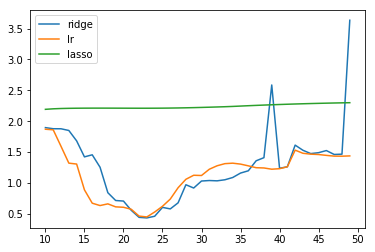

In [50]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.legend()
plt.show()

In [49]:
df.min()

lr_rmse       0.450275
lasso_rmse    2.192483
ridge_rmse    0.434448
dtype: float64

In [51]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.434448
22    0.443496
24    0.461329
21    0.557494
26    0.580369
Name: ridge_rmse, dtype: float64

In [52]:
poly_features = PolynomialFeatures(degree=23)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

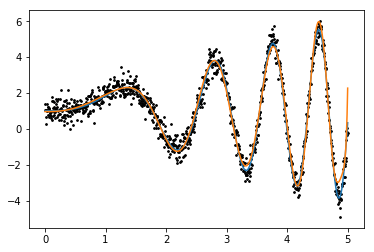

In [53]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()